In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.datasets import make_blobs, make_circles, make_classification, fetch_olivetti_faces
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve, roc_curve, auc
from statistics import mode

%matplotlib inline

In [2]:
def plot_decision_boundary(X, y, clf):
    x0_mesh, x1_mesh = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, 0.1),
                                 np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, 0.1))

    y_mesh_pred = clf.predict(np.c_[x0_mesh.ravel(), x1_mesh.ravel()])
    y_mesh_pred = y_mesh_pred.reshape(x0_mesh.shape)

    plt.contourf(x0_mesh, x1_mesh, y_mesh_pred, cmap="RdBu", vmin=0, vmax=1)
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, edgecolor = 'w', cmap="RdBu", vmin=-.2, vmax=1.2, linewidth=1)
    plt.show()

## Linear Decision Boundary

Training Accuracy: 1.0
Test Accuracy: 1.0


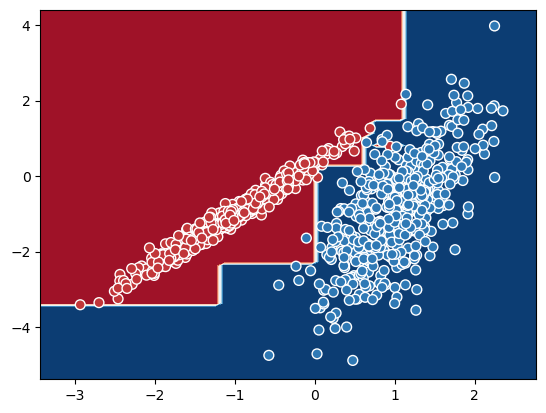

In [4]:
X, y = make_classification(
    n_samples = 1000, n_features=2, n_redundant=0, n_informative=2, random_state=4, n_clusters_per_class=1
)

x_train = X[:50,:]
x_test = X[50:,:]
y_train = y[:50]
y_test = y[50:]

clf = DecisionTreeClassifier().fit(X, y)
train_acc = clf.score(x_train,y_train)
test_acc = clf.score(x_test, y_test)

print(f'Training Accuracy: {train_acc}')
print(f'Test Accuracy: {test_acc}')
plot_decision_boundary(x_test,y_test,clf)

Training Accuracy: 1.0
Test Accuracy: 1.0


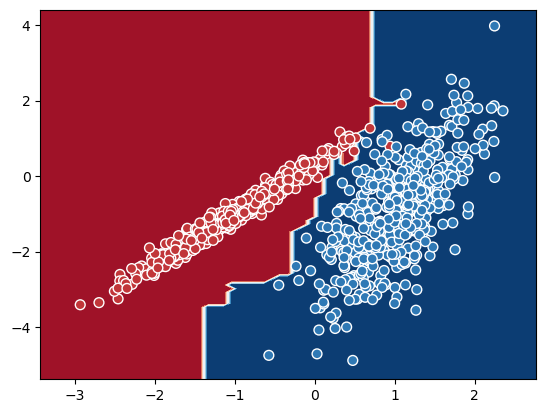

In [5]:
clf = RandomForestClassifier().fit(X, y)
train_acc = clf.score(x_train,y_train)
test_acc = clf.score(x_test, y_test)

print(f'Training Accuracy: {train_acc}')
print(f'Test Accuracy: {test_acc}')
plot_decision_boundary(x_test,y_test,clf)

## Bagged Trees

In [7]:
colnames = ['Pregnancies','Glucose','BP','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Class']
df = pd.read_csv('pima-indians-diabetes.csv', names=colnames)

X = df.iloc[:,0:8]
y = df.iloc[:,8]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


In [8]:
df.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
np.arange(X_train.shape[0])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [10]:
pred_list = []
oob_score_list = []
len_oob_list = []
n_trees = 100

for i in range(n_trees):
    boot_idx = np.random.choice(X_train.shape[0], size=X_train.shape[0], replace=True)
    X_boot = X_train[boot_idx,:]
    X_oob = np.delete(X_train,boot_idx,axis=0)
    y_boot = y_train[boot_idx]
    y_oob = np.delete(y_train,boot_idx,axis=0)
    
    clf = DecisionTreeClassifier().fit(X_boot, y_boot)
    oob_score_list.append(clf.score(X_oob,y_oob))
    len_oob_list.append(len(y_oob))
    y_pred = clf.predict(X_test)
    
    pred_list.append(y_pred)

print("Average OOB Accuracy: " + str(int(np.mean(oob_score_list)*100)) + "%")
print("Average # of OOB observations: " + str(np.round(np.mean(len_oob_list),2)))

Average OOB Accuracy: 69%
Average # of OOB observations: 226.23


In [11]:
226.08/614

0.36820846905537463

In [12]:
pred_list

[array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0],
       dtype=int64),
 array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
        0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0,

In [13]:
mode([x[4] for x in pred_list])

1

In [14]:
match_list = []
disagreements = 0

for i in range(len(pred_list[0])):
    all_preds = [x[i] for x in pred_list]
    pred_value = mode(all_preds)
    
    if pred_value == y_test[i]:
        match_list.append(1)
    else: 
        match_list.append(0)
        
    if not np.sum(all_preds) in ([0,100]):
        disagreements += 1

In [15]:
np.sum(match_list)/len(match_list)

0.7402597402597403

In [16]:
percent_with_no_disagreements = 1-(disagreements/len(match_list))

print("Approximately " + str(int(percent_with_no_disagreements *100)) + "% of the " + str(len(match_list)) + " observations had no disagreements among the predictions from 100 trees.")

Approximately 6% of the 154 observations had no disagreements among the predictions from 100 trees.


## Random Forests

In [18]:
clf = RandomForestClassifier(n_estimators=100,
                            max_depth=None,
                            oob_score=True,
                            random_state=21)
clf.fit(X_train,y_train)

RandomForestClassifier(oob_score=True, random_state=21)

In [19]:
clf.oob_score_

0.7638436482084691

In [20]:
clf.score(X_test, y_test)

0.7532467532467533

In [21]:
clf.feature_importances_

array([0.08023555, 0.27581825, 0.08141109, 0.07106879, 0.07596801,
       0.16229862, 0.1222249 , 0.1309748 ])

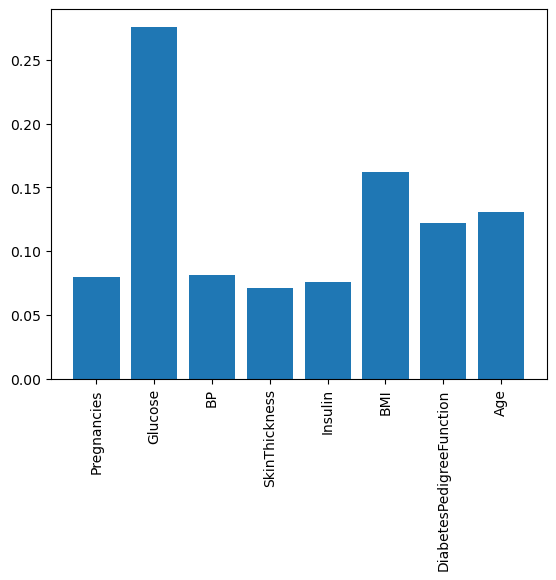

In [22]:
plt.bar(x=colnames[:8],height=clf.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

In [23]:
cv_perm_imp = []
folds = np.random.randint(0,10,X_train.shape[0])

for i in range(10):
    train_fold_x = X_train[folds != i]
    train_fold_y = y_train[folds != i]
    val_fold_x = X_train[folds == i]
    val_fold_y = y_train[folds == i]
    
    clf = RandomForestClassifier().fit(train_fold_x, train_fold_y)
    
    perm_imp = permutation_importance(clf, val_fold_x, val_fold_y, n_repeats = 30, random_state=24)
    cv_perm_imp.append(perm_imp['importances_mean'])

cv_perm_imp = np.stack(cv_perm_imp)

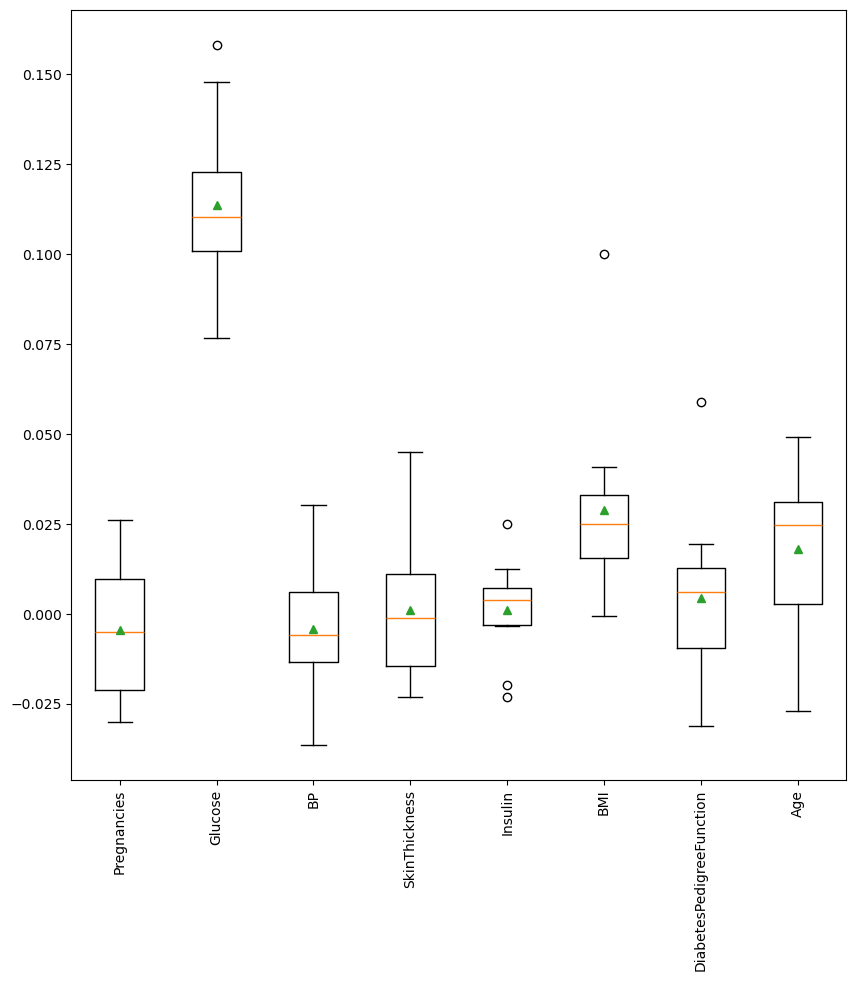

In [24]:
plt.figure(figsize=(10, 10))
plt.boxplot(cv_perm_imp, labels = colnames[:8], showmeans=True)
plt.xticks(rotation = 90)
plt.show()

## Sensitivity to Hyperparameters

In [26]:
data = fetch_olivetti_faces()
X, y = data.data, data.target
mask = y < 30
X = X[mask]
y = y[mask]

print(X.shape)

(300, 4096)


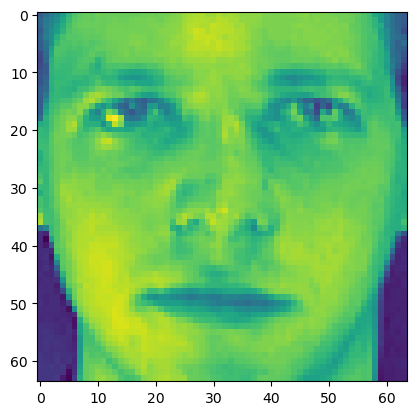

In [27]:
plt.imshow(X[0].reshape((64,64)))

In [28]:
10/300

0.03333333333333333

C:\Users\Chanc\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\Chanc\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[0.2, 0.6, 0.8266666666666667, 0.9366666666666666, 0.9633333333333334, 0.9633333333333334, 0.9566666666666667]


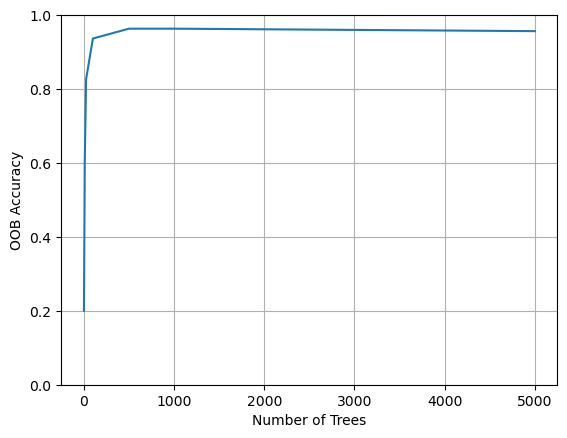

In [29]:
n_trees = [1,10,25,100,500,1000,5000]

oob_acc = []
for n in n_trees:
    clf = RandomForestClassifier(n_estimators=n,
                                 max_depth=None,
                                 max_features=25,
                                 oob_score=True)
    clf.fit(X,y)
    oob_acc.append(clf.oob_score_)

plt.grid()
plt.ylim([0, 1.0])
plt.plot(n_trees, oob_acc)
plt.xlabel("Number of Trees")
plt.ylabel("OOB Accuracy")
print(oob_acc)

In [30]:
np.sqrt(4096)

64.0

[0.91, 0.9333333333333333, 0.93, 0.92, 0.9233333333333333, 0.9133333333333333]


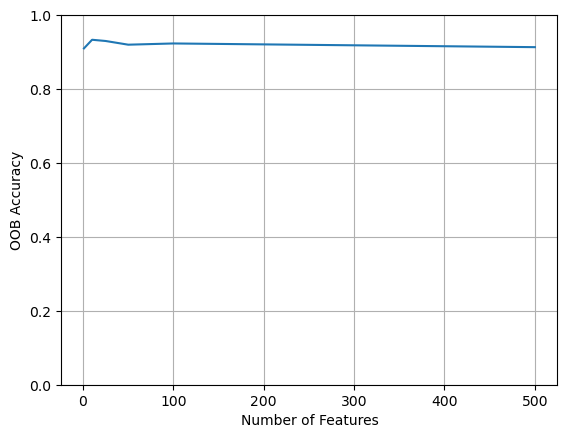

In [31]:
n_features_per_split = [1,10,25,50,100,500]

oob_acc = []
for n in n_features_per_split:
    clf = RandomForestClassifier(n_estimators=100,
                                 max_depth=None,
                                 max_features=n,
                                 oob_score=True)
    clf.fit(X,y)
    oob_acc.append(clf.oob_score_)

plt.grid()
plt.ylim([0, 1.0])
plt.plot(n_features_per_split, oob_acc)
plt.xlabel("Number of Features")
plt.ylabel("OOB Accuracy")
print(oob_acc)

[0.21333333333333335, 0.64, 0.9033333333333333, 0.93, 0.94, 0.9433333333333334]


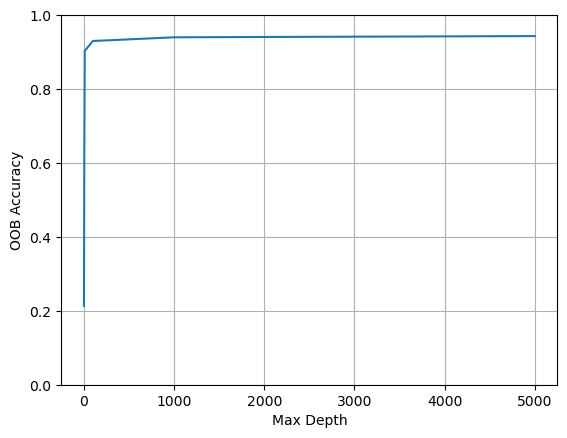

In [32]:
max_depth = [1,5,10,100,1000,5000]

oob_acc = []
for n in max_depth:
    clf = RandomForestClassifier(n_estimators=100,
                                 max_depth=n,
                                 max_features=25,
                                 oob_score=True)
    clf.fit(X,y)
    oob_acc.append(clf.oob_score_)

plt.grid()
plt.ylim([0, 1.0])
plt.plot(max_depth, oob_acc)
plt.xlabel("Max Depth")
plt.ylabel("OOB Accuracy")
print(oob_acc)

In [33]:
data = fetch_olivetti_faces()
X, y = data.data, data.target
mask = y < 5
X = X[mask]
y = y[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

forest = RandomForestClassifier(n_estimators=750, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=750, random_state=42)

In [34]:
img_shape = data.images[0].shape
importances = forest.feature_importances_

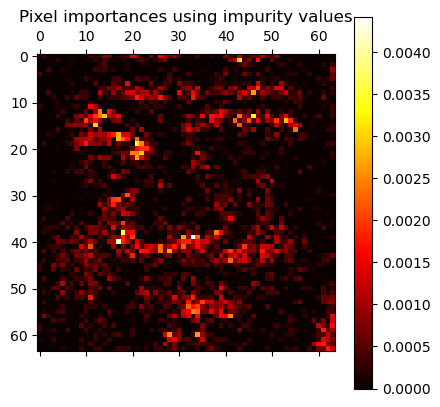

In [35]:
imp_reshaped = importances.reshape(img_shape)
plt.matshow(imp_reshaped, cmap=plt.cm.hot)
plt.title("Pixel importances using impurity values")
plt.colorbar()
plt.show()

In [36]:
perm_imp = permutation_importance(clf, 
                                  X_test, 
                                  y_test, 
                                  n_repeats = 10, 
                                  random_state=24)

In [37]:
# imp_reshaped = perm_imp.reshape(img_shape)
# plt.matshow(imp_reshaped, cmap=plt.cm.hot)
# plt.title("Pixel importances using permutation")
# plt.colorbar()
# plt.show()

AttributeError: reshape

## Extremely Randomized Trees

https://www.kaggle.com/datasets/mukeshmanral/churn-prediction-for-credit-card-customer

In [38]:
import time

In [40]:
churn = pd.read_csv('Churn.csv')
churn = pd.get_dummies(churn, drop_first = True)
print(churn.shape)
churn.head()

(10000, 12)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [42]:
X = churn.drop(columns = ['Exited'])
#X = pd.get_dummies(X, drop_first = True)

y = churn['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [44]:
pred_list = []
oob_score_list = []
len_oob_list = []
total_time = 0

for i in range(100):
    t0 = time.time()
    boot_idx = np.random.choice(X_train.shape[0], size=X_train.shape[0], replace=True)
    X_boot = X_train[boot_idx,:]
    X_oob = np.delete(X_train,boot_idx,axis=0)
    y_boot = y_train[boot_idx]
    y_oob = np.delete(y_train,boot_idx,axis=0)
    
    clf = DecisionTreeClassifier().fit(X_boot, y_boot)

    oob_score_list.append(clf.score(X_oob,y_oob))
    t1 = time.time()
    
    total_time += (t1-t0)
    len_oob_list.append(len(y_oob))
    y_pred = clf.predict(X_test)
    
    pred_list.append(y_pred)

print("Time to fit and get OOB score: " + str(total_time) + "s")
print("Average OOB Accuracy: " + str(int(np.mean(oob_score_list)*100)) + "%")

match_list = []

for i in range(len(pred_list[0])):
    all_preds = [x[i] for x in pred_list]
    pred_value = mode(all_preds)
    
    if pred_value == y_test[i]:
        match_list.append(1)
    else: 
        match_list.append(0)

print("Test Accuracy: " + str(np.round((np.sum(match_list)/len(match_list))*100,2)) + "%")

Time to fit and get OOB score: 2.240622043609619s
Average OOB Accuracy: 79%
Test Accuracy: 85.7%


In [46]:
t0 = time.time()
forest = RandomForestClassifier(n_estimators=100, oob_score=True).fit(X_train, y_train)
t1 = time.time()

print("Time to fit and get OOB score: " + str(t1-t0) + "s")
print("Average OOB Accuracy: " + str(int(forest.oob_score_*100)) + "%")
print("Test Accuracy: " + str(np.round(forest.score(X_test,y_test)*100,2)) + "%")

Time to fit and get OOB score: 0.6201815605163574s
Average OOB Accuracy: 86%
Test Accuracy: 86.1%


In [48]:
0.4238/0.7686

0.5513921415560761

In [50]:
from sklearn.ensemble import ExtraTreesClassifier

t0 = time.time()
extra = ExtraTreesClassifier(n_estimators=500, oob_score=True, bootstrap=True).fit(X_train, y_train)
t1 = time.time()

print("Time to fit and get OOB score: " + str(t1-t0) + "s")
print("Average OOB Accuracy: " + str(int(extra.oob_score_*100)) + "%")
print("Test Accuracy: " + str(np.round(extra.score(X_test,y_test)*100,2)) + "%")

Time to fit and get OOB score: 1.7051703929901123s
Average OOB Accuracy: 85%
Test Accuracy: 85.2%


## Partial Dependence Plots

In [ ]:
churn

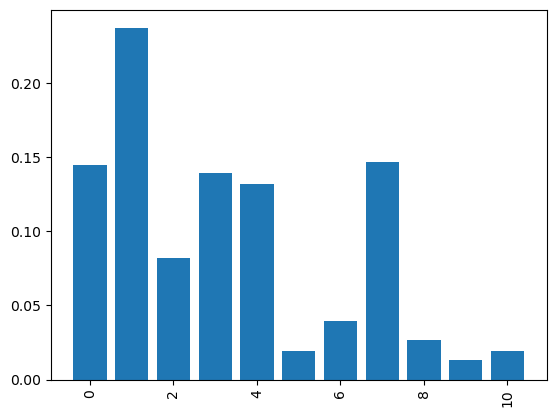

In [52]:
plt.bar(x = np.arange(11),height=forest.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

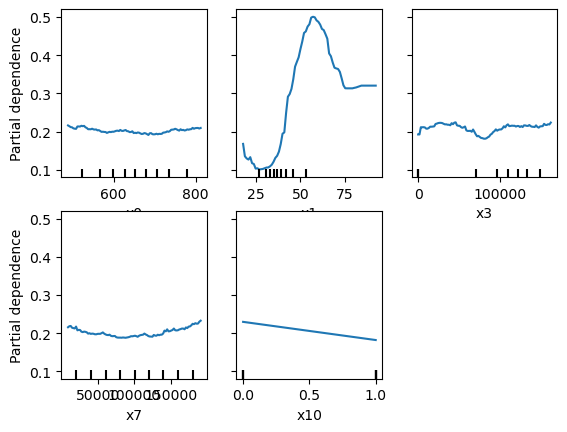

In [54]:
from sklearn.inspection import PartialDependenceDisplay

features = [0,1,3,7,10]
PartialDependenceDisplay.from_estimator(forest, X_train, features)

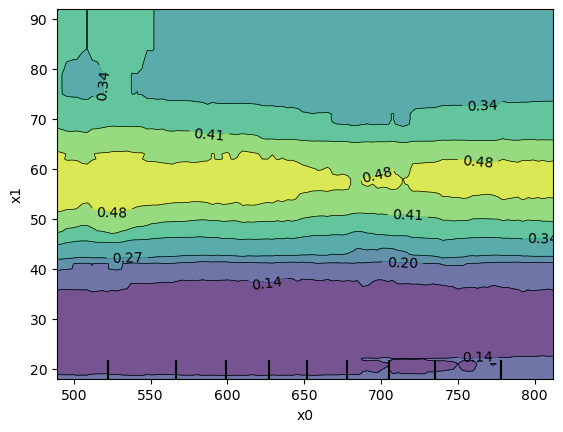

In [55]:
features = [(0, 1)]
PartialDependenceDisplay.from_estimator(forest, X_train, features)